In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("sales_data_sample.csv",sep=",", encoding='Latin-1')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [12]:
x = df.iloc[:,[1,4]].values

In [13]:
x

array([[  30.  , 2871.  ],
       [  34.  , 2765.9 ],
       [  41.  , 3884.34],
       ...,
       [  43.  , 5417.57],
       [  34.  , 2116.16],
       [  47.  , 3079.44]])

In [14]:
from sklearn.cluster import KMeans

In [19]:
#elbow method
wcss_list = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=12)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)

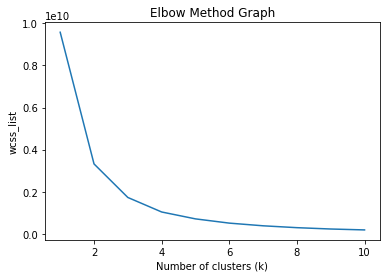

In [20]:
plt.plot(range(1,11), wcss_list)
plt.title("Elbow Method Graph")
plt.xlabel('Number of clusters (k)')
plt.ylabel('wcss_list')
plt.show()

In [21]:
# K-mean clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=23)
y_pred = kmeans.fit_predict(x)

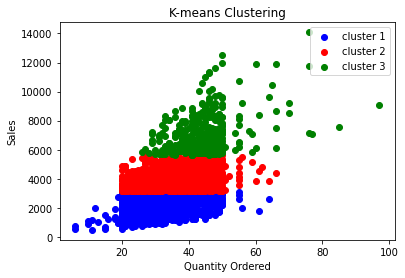

In [24]:
plt.scatter(x[y_pred==0,0], x[y_pred==0,1], c='blue',label='cluster 1')
plt.scatter(x[y_pred==1,0], x[y_pred==1,1], c='red',label='cluster 2')
plt.scatter(x[y_pred==2,0], x[y_pred==2,1], c='green',label='cluster 3')
plt.title('K-means Clustering')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.legend()
plt.show()